In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf
from tensorflow import keras

In [2]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
print(housing.DESCR)
print(housing.data.shape)
print(housing.target.shape)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [3]:
from sklearn.model_selection import train_test_split

x_train_all, x_test, y_train_all, y_test = train_test_split(
    housing.data, housing.target, random_state = 7)
x_train, x_valid, y_train, y_valid = train_test_split(
    x_train_all, y_train_all, random_state = 11)
print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)
print(x_test.shape, y_test.shape)


(11610, 8) (11610,)
(3870, 8) (3870,)
(5160, 8) (5160,)


In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_valid_scaled = scaler.transform(x_valid)
x_test_scaled = scaler.transform(x_test)

In [5]:
#RandomizedSearchCV
#1.转化为sklearn模型
# 2.定义参数集合
# 3.搜索参数

def bulid_model(hidden_layers= 1, layer_size= 32, learnning_rate= 3e-3):
    model = keras.models.Sequential()
    model.add(keras.layers.Dense(layer_size, activation= "relu", input_shape= x_train.shape[1:]))
    for _ in range(hidden_layers - 1):
        model.add(keras.layers.Dense(layer_size, activation= "relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(learnning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

sklearn_model = keras.wrappers.scikit_learn.KerasRegressor(bulid_model)
callbacks = [keras.callbacks.EarlyStopping(patience=5, min_delta=1e-2)]

history = sklearn_model.fit(x_train_scaled, y_train,validation_data = (x_valid_scaled, y_valid),epochs = 100,callbacks = callbacks)

Train on 11610 samples, validate on 3870 samples
Epoch 1/100
11610/11610 [==============================] - 2s 204us/sample - loss: 1.1640 - val_loss: 0.7723
Epoch 2/100
11610/11610 [==============================] - 1s 70us/sample - loss: 0.6397 - val_loss: 0.6278
Epoch 3/100
11610/11610 [==============================] - 1s 58us/sample - loss: 0.5464 - val_loss: 0.5691
Epoch 4/100
11610/11610 [==============================] - 0s 42us/sample - loss: 0.5054 - val_loss: 0.5323
Epoch 5/100
11610/11610 [==============================] - 1s 53us/sample - loss: 0.4817 - val_loss: 0.5048
Epoch 6/100
11610/11610 [==============================] - 1s 68us/sample - loss: 0.4653 - val_loss: 0.4920
Epoch 7/100
11610/11610 [==============================] - 1s 59us/sample - loss: 0.4531 - val_loss: 0.4766
Epoch 8/100
11610/11610 [==============================] - 1s 52us/sample - loss: 0.4465 - val_loss: 0.4675
Epoch 9/100
11610/11610 [==============================] - 1s 73us/sample - loss: 0.43

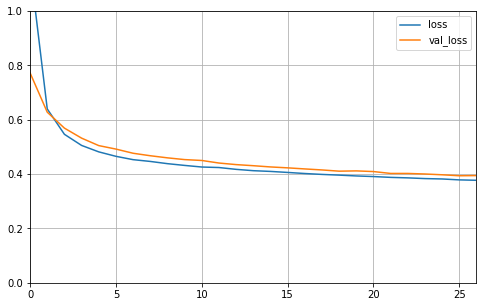

In [6]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()
plot_learning_curves(history)

In [20]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribution = {
    "hidden_layers":[1,2,3,4],
    "layer_size":np.arange(1, 100),
    "learnning_rate":reciprocal(1e-4, 1e-2),
}

random_search_cv = RandomizedSearchCV(sklearn_model, param_distribution, n_iter=10, n_jobs=1)
random_search_cv.fit(x_train_scaled,y_train)

Train on 9288 samples
9288/9288 [==============================] - 1s 109us/sample - loss: 1.4509
2322/1 [==============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Train on 9288 samples
9288/9288 [==============================] - 1s 123us/sample - loss: 1.7449
2322/1 [==============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Train on 9288 samples
9288/9288 [==============================] - 1s 134us/sample - loss: 1.7373
2322/1 [==============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Train on 9288 samples
9288/9288 [==============================] - 1s 117us/sample - loss: 1.7048
2322/1 [==============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Train on 9288 samples
9288/9288 [==============================] - 1s 102us/sample - loss: 1.5799
2322/1 [==============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Train on 9288 samples
9288/9288 [==============================] - 1s 115us/sample - loss: 1.4300
2322/1 [==============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Train on 9288 samples
9288/9288 [==============================] - 2s 167us/sample - loss: 0.9038
2322/1 [==============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Train on 9288 samples
9288/9288 [==============================] - 1s 130us/sample - loss: 1.0034
2322/1 [==============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Train on 9288 samples
9288/9288 [==============================] - 1s 100us/sample - loss: 1.3520
2322/1 [==============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Train on 9288 samples
9288/9288 [==============================] - 1s 101us/sample - loss: 1.0110
2322/1 [==============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Train on 9288 samples
9288/9288 [==============================] - 1s 77us/sample - loss: 3.4823
2322/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Train on 9288 samples
9288/9288 [==============================] - 1s 117us/sample - loss: 3.4267
2322/1 [==============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Train on 9288 samples
9288/9288 [==============================] - 1s 76us/sample - loss: 3.3772
2322/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Train on 9288 samples
9288/9288 [==============================] - 1s 74us/sample - loss: 3.3501
2322/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Train on 9288 samples
9288/9288 [==============================] - 1s 80us/sample - loss: 3.2400
2322/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Train on 9288 samples
9288/9288 [==============================] - 1s 100us/sample - loss: 2.0658
2322/1 [==============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Train on 9288 samples
9288/9288 [==============================] - 1s 96us/sample - loss: 1.8559
2322/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Train on 9288 samples
9288/9288 [==============================] - 1s 131us/sample - loss: 1.9311
2322/1 [==============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Train on 9288 samples
9288/9288 [==============================] - 1s 109us/sample - loss: 1.7313
2322/1 [==============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Train on 9288 samples
9288/9288 [==============================] - 1s 115us/sample - loss: 1.6979
2322/1 [==============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Train on 9288 samples
9288/9288 [==============================] - 1s 95us/sample - loss: 3.0134
2322/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Train on 9288 samples
9288/9288 [==============================] - 1s 108us/sample - loss: 3.4813
2322/1 [==============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Train on 9288 samples
9288/9288 [==============================] - 1s 113us/sample - loss: 2.1988
2322/1 [==============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Train on 9288 samples
9288/9288 [==============================] - 1s 106us/sample - loss: 3.2507
2322/1 [==============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Train on 9288 samples
9288/9288 [==============================] - 1s 87us/sample - loss: 3.4495
2322/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Train on 9288 samples
9288/9288 [==============================] - 1s 119us/sample - loss: 2.0673
2322/1 [==============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Train on 9288 samples
9288/9288 [==============================] - 1s 114us/sample - loss: 2.1320
2322/1 [==============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Train on 9288 samples
9288/9288 [==============================] - 1s 92us/sample - loss: 2.1404
2322/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Train on 9288 samples
9288/9288 [==============================] - 1s 87us/sample - loss: 1.8778
2322/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Train on 9288 samples
9288/9288 [==============================] - 1s 88us/sample - loss: 2.1726
2322/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Train on 9288 samples
9288/9288 [==============================] - 1s 98us/sample - loss: 1.3011
2322/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Train on 9288 samples
9288/9288 [==============================] - 1s 84us/sample - loss: 1.7516
2322/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Train on 9288 samples
9288/9288 [==============================] - 1s 98us/sample - loss: 1.3554
2322/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Train on 9288 samples
9288/9288 [==============================] - 1s 115us/sample - loss: 1.3265
2322/1 [==============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Train on 9288 samples
9288/9288 [==============================] - 1s 100us/sample - loss: 1.2769
2322/1 [==============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Train on 9288 samples
9288/9288 [==============================] - 1s 140us/sample - loss: 2.6872
2322/1 [==============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Train on 9288 samples
9288/9288 [==============================] - 1s 97us/sample - loss: 3.2042
2322/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Train on 9288 samples
9288/9288 [==============================] - 1s 104us/sample - loss: 3.7280
2322/1 [==============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Train on 9288 samples
9288/9288 [==============================] - 1s 111us/sample - loss: 3.7094
2322/1 [==============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Train on 9288 samples
9288/9288 [==============================] - 1s 103us/sample - loss: 3.4938
2322/1 [==============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Train on 9288 samples
9288/9288 [==============================] - 1s 109us/sample - loss: 4.4766
2322/1 [==============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Train on 9288 samples
9288/9288 [==============================] - 1s 116us/sample - loss: 4.1839
2322/1 [==============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Train on 9288 samples
9288/9288 [==============================] - 1s 99us/sample - loss: 4.5956
2322/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Train on 9288 samples
9288/9288 [==============================] - 1s 101us/sample - loss: 4.6263
2322/1 [==============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Train on 9288 samples
9288/9288 [==============================] - 1s 99us/sample - loss: 4.2518
2322/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Train on 9288 samples
9288/9288 [==============================] - 1s 102us/sample - loss: 3.2635
2322/1 [==============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Train on 9288 samples
9288/9288 [==============================] - 1s 104us/sample - loss: 4.8480
2322/1 [==============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Train on 9288 samples
9288/9288 [==============================] - 1s 100us/sample - loss: 3.8720
2322/1 [==============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Train on 9288 samples
9288/9288 [==============================] - 1s 150us/sample - loss: 5.4445
2322/1 [==============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Train on 9288 samples
9288/9288 [==============================] - 1s 102us/sample - loss: 4.6872
2322/1 [==============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

RuntimeError: Cannot clone object <tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x000001D903FA3E88>, as the constructor either does not set or modifies parameter layer_size

In [21]:
print(random_search_cv.best_params_)
print(random_search_cv.best_score_)
print(random_search_cv.best_estimator_)

{'hidden_layers': 4, 'layer_size': 20, 'learnning_rate': 0.009610892254852397}
-0.6031084340518144


AttributeError: 'RandomizedSearchCV' object has no attribute 'best_estimator_'

In [ ]:
model = random_search_cv.best_estimator_.model
model.evaluate(x_test_scaled,y_test)